In [212]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans

from skimage.filters import gabor_kernel

import pandas as pd
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [213]:
def load_data(image):
  image = cv2.imread(image,1)
  gray_image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  plt.imshow(gray_image , cmap='gray')
  return gray_image

In [214]:
def build_filters():
  kernels = []  #Create empty list to hold all kernels that we will generate in a loop
  for theta in range(0, 8):
    theta = theta / 4. * np.pi
    for frequency in (0.1, 0.3 , 0.5 , 0.7, 0.9):
      for sigma in (1 , 2 , 3):
        kernel = gabor_kernel(frequency, theta=theta , sigma_x=sigma , sigma_y=sigma)
        kernels.append(np.real(kernel))
  return kernels

In [215]:
def compute_kernels(img):

  #Save original image pixels into a data frame. This is our Feature #1.
  img2 = img.reshape(-1)
  df = pd.DataFrame()
  df['Original Image'] = img2

  #Generate Gabor features
  num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
  filters = build_filters()
  for filter in filters:
    #Now filter the image and add values to a new column 
    fimg = cv2.filter2D(img2, cv2.CV_8UC3, filter)                
    filtered_img = fimg.reshape(-1)

    df[num] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
    num += 1  #Increment for gabor column label
  return df , num

In [216]:
def Clustering(df , num , k ,w , h):
  data = df.loc[: , 1:num-1].values

  X_scaled = preprocessing.MinMaxScaler().fit_transform(data)

  kmeans = KMeans(n_clusters=3).fit(X_scaled)
  label = kmeans.fit_predict(X_scaled)
  label = label.reshape(w, h)
  plt.imshow(label)

In [217]:
def use_gabor(img , k):
  img = load_data(img)
  w , h = img.shape[0] , img.shape[1]

  df , num = compute_kernels(img)

  Clustering(df , num , k , w , h)



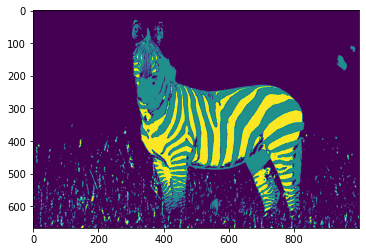

In [218]:
use_gabor("img1.jpg" , 3)

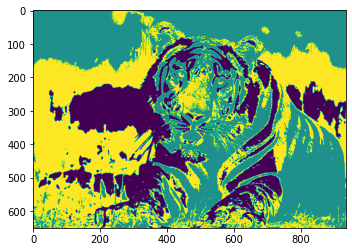

In [221]:
use_gabor("img2.jpg" , 3)

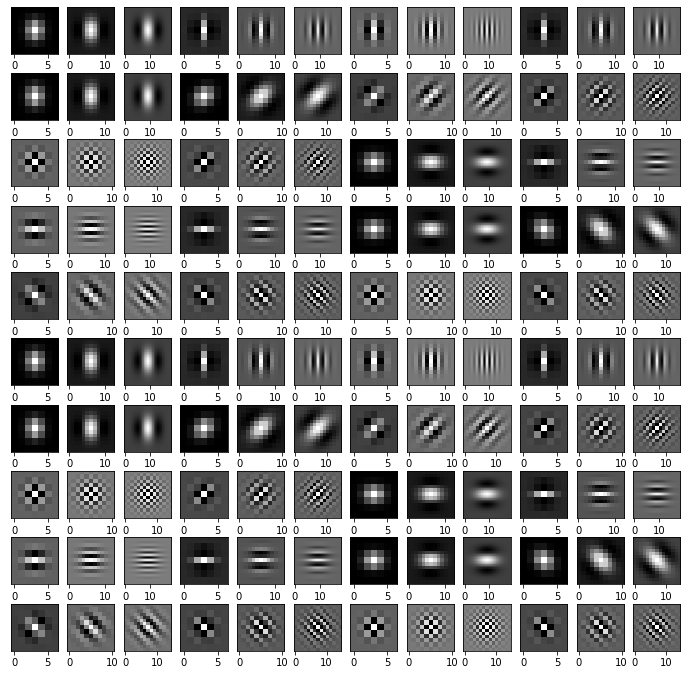

In [220]:
filters = build_filters()

plt.figure(figsize=(12,12))
for i in range(len(filters)):
  plt.subplot(10,12,i+1)
  plt.imshow(filters[i].astype(float) , cmap = 'gray')
  plt.yticks([])
plt.show()  